In [2]:
#load the frame numbers

import pickle
def load_dict(name ):
    with open('frames/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
frame_nums = load_dict('frames_vid1')

In [3]:
#load the video
import imageio
filename = 'U18 vs Waterloo Period 1.mp4'
vid = imageio.get_reader(filename,  'ffmpeg')

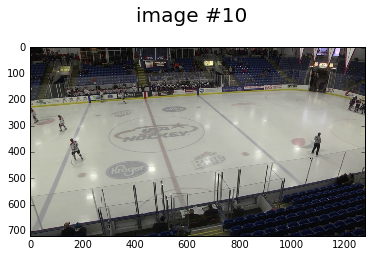

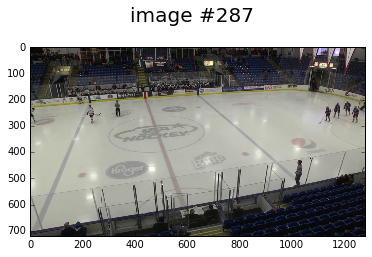

In [4]:
#test video frames
import pylab
nums = [10, 287]

for num in nums:
    image = vid.get_data(num)
    fig = pylab.figure()
    fig.suptitle('image #{}'.format(num), fontsize=20)
    pylab.imshow(image)
pylab.show()

In [4]:
#in the impact_frames, add 30 values before the frame and 30 after the frame
impact_frames = list()
sorted_frames = sorted(frame_nums.values())
for val in sorted_frames:
    for i in range(val-30,val +30):
        impact_frames.append(i) 

print(impact_frames)

[13050, 13051, 13052, 13053, 13054, 13055, 13056, 13057, 13058, 13059, 13060, 13061, 13062, 13063, 13064, 13065, 13066, 13067, 13068, 13069, 13070, 13071, 13072, 13073, 13074, 13075, 13076, 13077, 13078, 13079, 13080, 13081, 13082, 13083, 13084, 13085, 13086, 13087, 13088, 13089, 13090, 13091, 13092, 13093, 13094, 13095, 13096, 13097, 13098, 13099, 13100, 13101, 13102, 13103, 13104, 13105, 13106, 13107, 13108, 13109, 18150, 18151, 18152, 18153, 18154, 18155, 18156, 18157, 18158, 18159, 18160, 18161, 18162, 18163, 18164, 18165, 18166, 18167, 18168, 18169, 18170, 18171, 18172, 18173, 18174, 18175, 18176, 18177, 18178, 18179, 18180, 18181, 18182, 18183, 18184, 18185, 18186, 18187, 18188, 18189, 18190, 18191, 18192, 18193, 18194, 18195, 18196, 18197, 18198, 18199, 18200, 18201, 18202, 18203, 18204, 18205, 18206, 18207, 18208, 18209, 18390, 18391, 18392, 18393, 18394, 18395, 18396, 18397, 18398, 18399, 18400, 18401, 18402, 18403, 18404, 18405, 18406, 18407, 18408, 18409, 18410, 18411, 18412

In [14]:
#         def generate_arrays_from_file(path):
#             while 1:
#                 f = open(path)
#                 for line in f:
#                     # create numpy arrays of input data
#                     # and labels, from each line in the file
#                     x1, x2, y = process_line(line)
#             yield ({'input_1': x1, 'input_2': x2}, {'output': y})
#                 f.close()
def generate_data():
    """
    generates video frames and labels to train/validate model(use different function to test)
    yields:
        x: video frame
        y: label
    args:
        video_file: the file containing the video to process
        frame_file: the frame containing the labeled impact
    """
    vid = imageio.get_reader(video_file,  'ffmpeg')
    vid_frame_count = 0
    impact_frame_count = 0
    for data in vid.iter_data():
        if vid_frame_count == impact_frames[impact_frame_count]:
            yield(('impact',vid_frame_count))
            impact_frame_count+=1
            vid_frame_count+=1
        else:
            yield(('no impact', vid_frame_count))
            vid_frame_count += 1

In [15]:
for val in generate_data('U18 vs Waterloo Period 1.mp4'):
    print(val)

('no impact', 0)
('no impact', 1)
('no impact', 2)
('no impact', 3)
('no impact', 4)
('no impact', 5)
('no impact', 6)
('no impact', 7)
('no impact', 8)
('no impact', 9)
('no impact', 10)
('no impact', 11)
('no impact', 12)
('no impact', 13)
('no impact', 14)
('no impact', 15)
('no impact', 16)
('no impact', 17)
('no impact', 18)
('no impact', 19)
('no impact', 20)
('no impact', 21)
('no impact', 22)
('no impact', 23)
('no impact', 24)
('no impact', 25)
('no impact', 26)
('no impact', 27)
('no impact', 28)
('no impact', 29)
('no impact', 30)
('no impact', 31)
('no impact', 32)
('no impact', 33)
('no impact', 34)
('no impact', 35)
('no impact', 36)
('no impact', 37)
('no impact', 38)
('no impact', 39)
('no impact', 40)
('no impact', 41)
('no impact', 42)
('no impact', 43)
('no impact', 44)
('no impact', 45)
('no impact', 46)
('no impact', 47)
('no impact', 48)
('no impact', 49)
('no impact', 50)
('no impact', 51)
('no impact', 52)
('no impact', 53)
('no impact', 54)
('no impact', 55)
('

KeyboardInterrupt: 

In [16]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)


Using TensorFlow backend.


In [17]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 2 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')



In [9]:
# train the model on the new data for a few epochs
help(model.fit_generator)



Help on method fit_generator in module keras.engine.training:

fit_generator(generator, steps_per_epoch, epochs=1, verbose=1, callbacks=None, validation_data=None, validation_steps=None, class_weight=None, max_q_size=10, workers=1, pickle_safe=False, initial_epoch=0) method of keras.engine.training.Model instance
    Fits the model on data yielded batch-by-batch by a Python generator.
    
    The generator is run in parallel to the model, for efficiency.
    For instance, this allows you to do real-time data augmentation
    on images on CPU in parallel to training your model on GPU.
    
    # Arguments
        generator: a generator.
            The output of the generator must be either
            - a tuple (inputs, targets)
            - a tuple (inputs, targets, sample_weights).
            All arrays should contain the same number of samples.
            The generator is expected to loop over its data
            indefinitely. An epoch finishes when `samples_per_epoch`
        

In [20]:
print(vid.get_meta_data())

{'plugin': 'ffmpeg', 'fps': 59.94, 'ffmpeg_version': '2.8.11-0ubuntu0.16.04.1 built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.4) 20160609', 'source_size': (1280, 720), 'nframes': 117086, 'size': (1280, 720), 'duration': 1953.39}


In [23]:
def generate_train_data():
    """
    generates video frames and labels to train/validate model(use different function to test)
    yields:
        x: video frame
        y: label
    args:
        video_file: the file containing the video to process
        frame_file: the frame containing the labeled impact
    """
    vid = imageio.get_reader('U18 vs Waterloo Period 1.mp4',  'ffmpeg')
    vid_frame_count = 0
    impact_frame_count = 0
    for data in vid.iter_data():
        if vid_frame_count == impact_frames[impact_frame_count]:
            yield(data,0)
            impact_frame_count+=1
            vid_frame_count+=1
        else:
            yield((data, 1))
            vid_frame_count += 1

In [58]:
import numpy as np
def generate_train_data_batch(batch_size=10):
    """
    generates video frames and labels to train/validate model(use different function to test)
    yields:
        x: video frame
        y: label
    args:
        video_file: the file containing the video to process
        frame_file: the frame containing the labeled impact
    """
    vid = imageio.get_reader('U18 vs Waterloo Period 1.mp4',  'ffmpeg')
    vid_frame_count = 0
    impact_frame_count = 0
    batch_count = 1
#     batch_images = list()
#     batch_labels = list()
    batch_features = np.zeros((batch_size, 720, 1280, 3))
    batch_labels = np.zeros((batch_size,2))
    for data in vid.iter_data():
        if batch_count % batch_size != 0 :
            if vid_frame_count == impact_frames[impact_frame_count]:
#                 batch_images.append(data)
                batch_features[batch_count] = np.array(data)
                batch_labels[batch_count] = [1,0]
                impact_frame_count+=1
                vid_frame_count+=1
            else:
                batch_features[batch_count] = np.array(data)
                batch_labels[batch_count] = [0,1]
                vid_frame_count += 1
            batch_count += 1
        else:
            yield batch_features, batch_labels
            batch_count = 1
            
        

In [59]:
model.fit_generator(generator=generate_train_data_batch(), steps_per_epoch=117086/10)
# model.summary()
# for val in generate_train_data_batch():
#     print(val)
# np.array(vid.get_data(10000)).shape

Epoch 1/1


Exception in thread Thread-40:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.5/threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/Keras-2.0.1-py3.5.egg/keras/engine/training.py", line 606, in data_generator_task
    generator_output = next(self._generator)
  File "<ipython-input-58-8194822a390e>", line 12, in generate_train_data_batch
    vid = imageio.get_reader('U18 vs Waterloo Period 1.mp4',  'ffmpeg')
  File "/usr/local/lib/python3.5/dist-packages/imageio/core/functions.py", line 129, in get_reader
    return format.get_reader(request)
  File "/usr/local/lib/python3.5/dist-packages/imageio/core/format.py", line 169, in get_reader
    return self.Reader(self, request)
  File "/usr/local/lib/python3.5/dist-packages/imageio/core/format.py", line 218, in __init__
    self._open(**self.request.kwargs.copy())
  File

ValueError: output of generator should be a tuple `(x, y, sample_weight)` or `(x, y)`. Found: None

In [ ]:
sorted_frames = sorted(frame_nums.values())
vid_frame_count = 0
impact_frame_count = 0
for data in vid.iter_data():
    if sorted_frames[impact_frame_count] == vid_frame_count:
        print(vid_frame_count)
        impact_frame_count+=1
    vid_frame_count += 1
    

In [ ]:
# # at this point, the top layers are well trained and we can start fine-tuning
# # convolutional layers from inception V3. We will freeze the bottom N layers
# # and train the remaining top layers.

# # let's visualize layer names and layer indices to see how many layers
# # we should freeze:
# for i, layer in enumerate(base_model.layers):
#    print(i, layer.name)

# # we chose to train the top 2 inception blocks, i.e. we will freeze
# # the first 249 layers and unfreeze the rest:
# for layer in model.layers[:249]:
#    layer.trainable = False
# for layer in model.layers[249:]:
#    layer.trainable = True

# # we need to recompile the model for these modifications to take effect
# # we use SGD with a low learning rate
# from keras.optimizers import SGD
# model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# # we train our model again (this time fine-tuning the top 2 inception blocks
# # alongside the top Dense layers
# model.fit_generator(...)